In [ ]:
##Decision Trees Apply are a classification model.
##They apply sequential conditional logic to the dataset, using the features from the train datasets to estimate the targets.
##In a decision tree, there are notable features:
###The Node, wihich is the split at which a logic question on the features is answered
###The Branches, which is the flow from one logic question (and its answer) to another
###The Root Node, which is the starting point
###The Leaf Node, which is the termination of the logic flow, it predicts the outcome
##Each logic flow has a depth. The Depth is the number of nodes from the Root to the Leaf (with 0 index starting at the Root).
##If a Decision Tree has 5 Leaf nodes (and therefore 5 flows), the Depth of the Tree is the longest path from the root to a leaf.
##Therefore, if the longest depth is 2, then the tree has a depth of 2

##Given the logical feature set and targets as below:
### A  | B  | C  | Target
### 1  | 1  | 1  | Green
### 1  | 1  | 0  | Green
### 0  | 0  | 1  | Blue
### 1  | 0  | 0  | Blue
##We see that B is the feature that best separates the target

##Entropy (H), from information theory, is a measure of impurity in the group.
##Entropy is directly proportional to information, and is given as
### H = -(i..sum..n of p(i)log(b2)p(i))
###i.e H = -p(1)log(b2)p(1) - p(2)log(b2)p(2) - p(3)log(b2)p3 - ... - p(n)log(b2)p(n)
##Information Gain is used to decide which feature to split on at each step in building the information tree
## IG = H(parent_node) - summation(H(child_node)xweight(child_node))
## where weight is the ratio of outcomes of child node to the total outomes

##From the data above:
### IG(A) = H_parent - (H_child(A=0)*weight(A=0) + H_child(A=1)*weight(A=1))
### H_parent= -(2/4)log(b2)(2/4) - (2/4)log(b2)(2/4)= 0.5 + 0.5 = 1
### H_child(A=0) = -(1)log(b2)(1) = 0
### H_chile(A=1) = -(1/3)log(b2)(1/3) - (2/3)log(b2)(2/3) = 0.5283+0.3899 = 0.9182
###Therefore, IG(A) = 1 - (0*1/4) - (0.9182*3/4) = 0.31
##Similarly
### IG(B) = H_parent - (H_child(B=0)*weight(B=0) + H_child(B=1)*weight(B=1))
### = 1 - ((-1)(2/2)log(b2)(2/2)*(2/4) + (-1)(2/2)log(b2)(2/2)*(2/4))
### = 1 - (0 + 0)
### = 1
##And
### IG(C) = H_parent - (H_child(C=0)*weight(C=0) + H_child(C=1)*weight(C=1))
### = 1 - [((-1)(1/2)log(b2)(1/2) + (-1)(1/2)log(b2)(1/2)) *(2/4) + ((-1)(1/2)log(b2)(1/2) + (-1)(1/2)log(b2)(1/2)) *(2/4)]
### = 1 - ((1*2/4) + (1*2/4))
### = 1 - 1
### = 0
##Therefore, splitting at B is the best
##Desision Trees can handle both numerical (regression) and categorical data. They are fast, easy to follow and understand
##However, they are expensive to train, and are easy to overfit

##Bootstrap is a stat tool used to quantify the uncertainty with a given estimator or statistical learning method
## If mean = sum of samples or values/no. of samples or values
## Then given dataset of 100 samples, the estimated mean may be given as 
### Est. mean = mean of mean of sub-sets with replacement
## Applying Bootstrapping to Decision Trees results in Bagging
## Here, the predictions of multiple ML algoritms are combined to make more accurate predictions than any single model
## For example, if having Bagged the dataset and the predictions from 5 ML models are G,G,G,B,B, then the final output will be G
## However, even with Bagging, the sub-sets and sub-models may still be correlating to each other, and have similar predictions
## Combining predictions works best if the sub-models are uncorrelated or weakly correlated

##Random Forests is a powerful ML algoritm which corrects the habit of overfitting of decision trees to their training dataset
## Essentially, it assembles multiple trees in randomly selected subsets at training time and outputs the class that is the mode (classification) or mean (regression)
## Because Decision Trees make use of the feature with the highest information gain, split subsets are likely to return the same answer
## This defeats the point of the data split, as the sub-models will be correlating to each other
## With Random Forest, randomly selected features are removed from each split, thereby de-correlating the trees
## For each tree, a random sample of features at every single split.
## The number of randomly selected features (m) selected from the full feature set (p) at each split is given by
### m = sqrt(p) (for classification)
### m = p/3 (for regression)

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/victornneji/Documents/Data Science with Python/Course_Material/S_13_Trees/HD_Cleveland_Data_Clean.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,N
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Y
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Y
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,N
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slop      297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 32.6+ KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [6]:
df['target'].value_counts()

target
N    160
Y    137
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

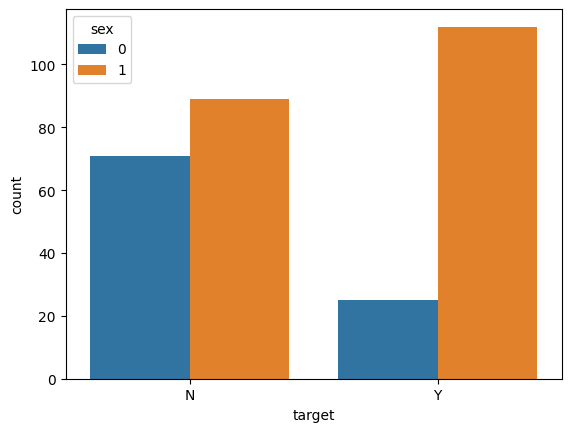

In [7]:
sns.countplot(data = df, x = 'target', hue = 'sex')

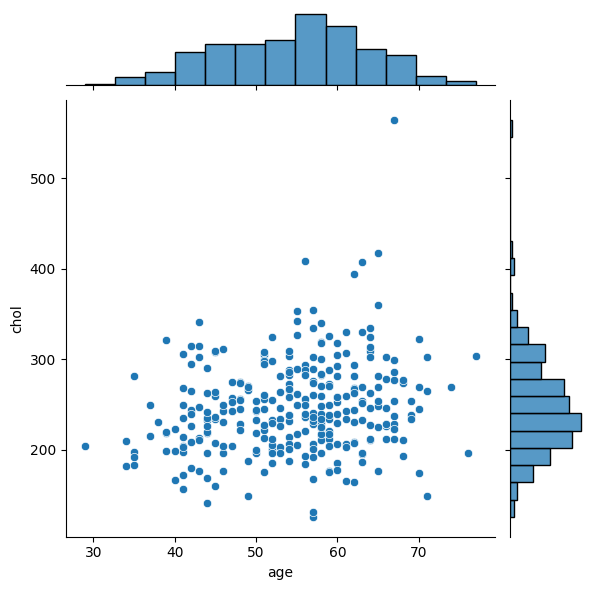

In [8]:
sns.jointplot(x = 'age', y= 'chol', data = df )

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


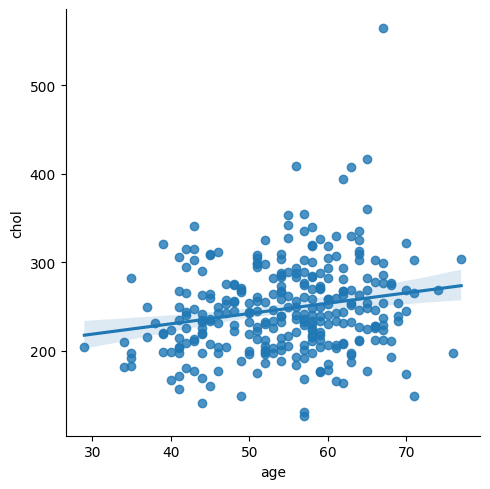

In [9]:
sns.lmplot(data = df, x = 'age', y= 'chol')

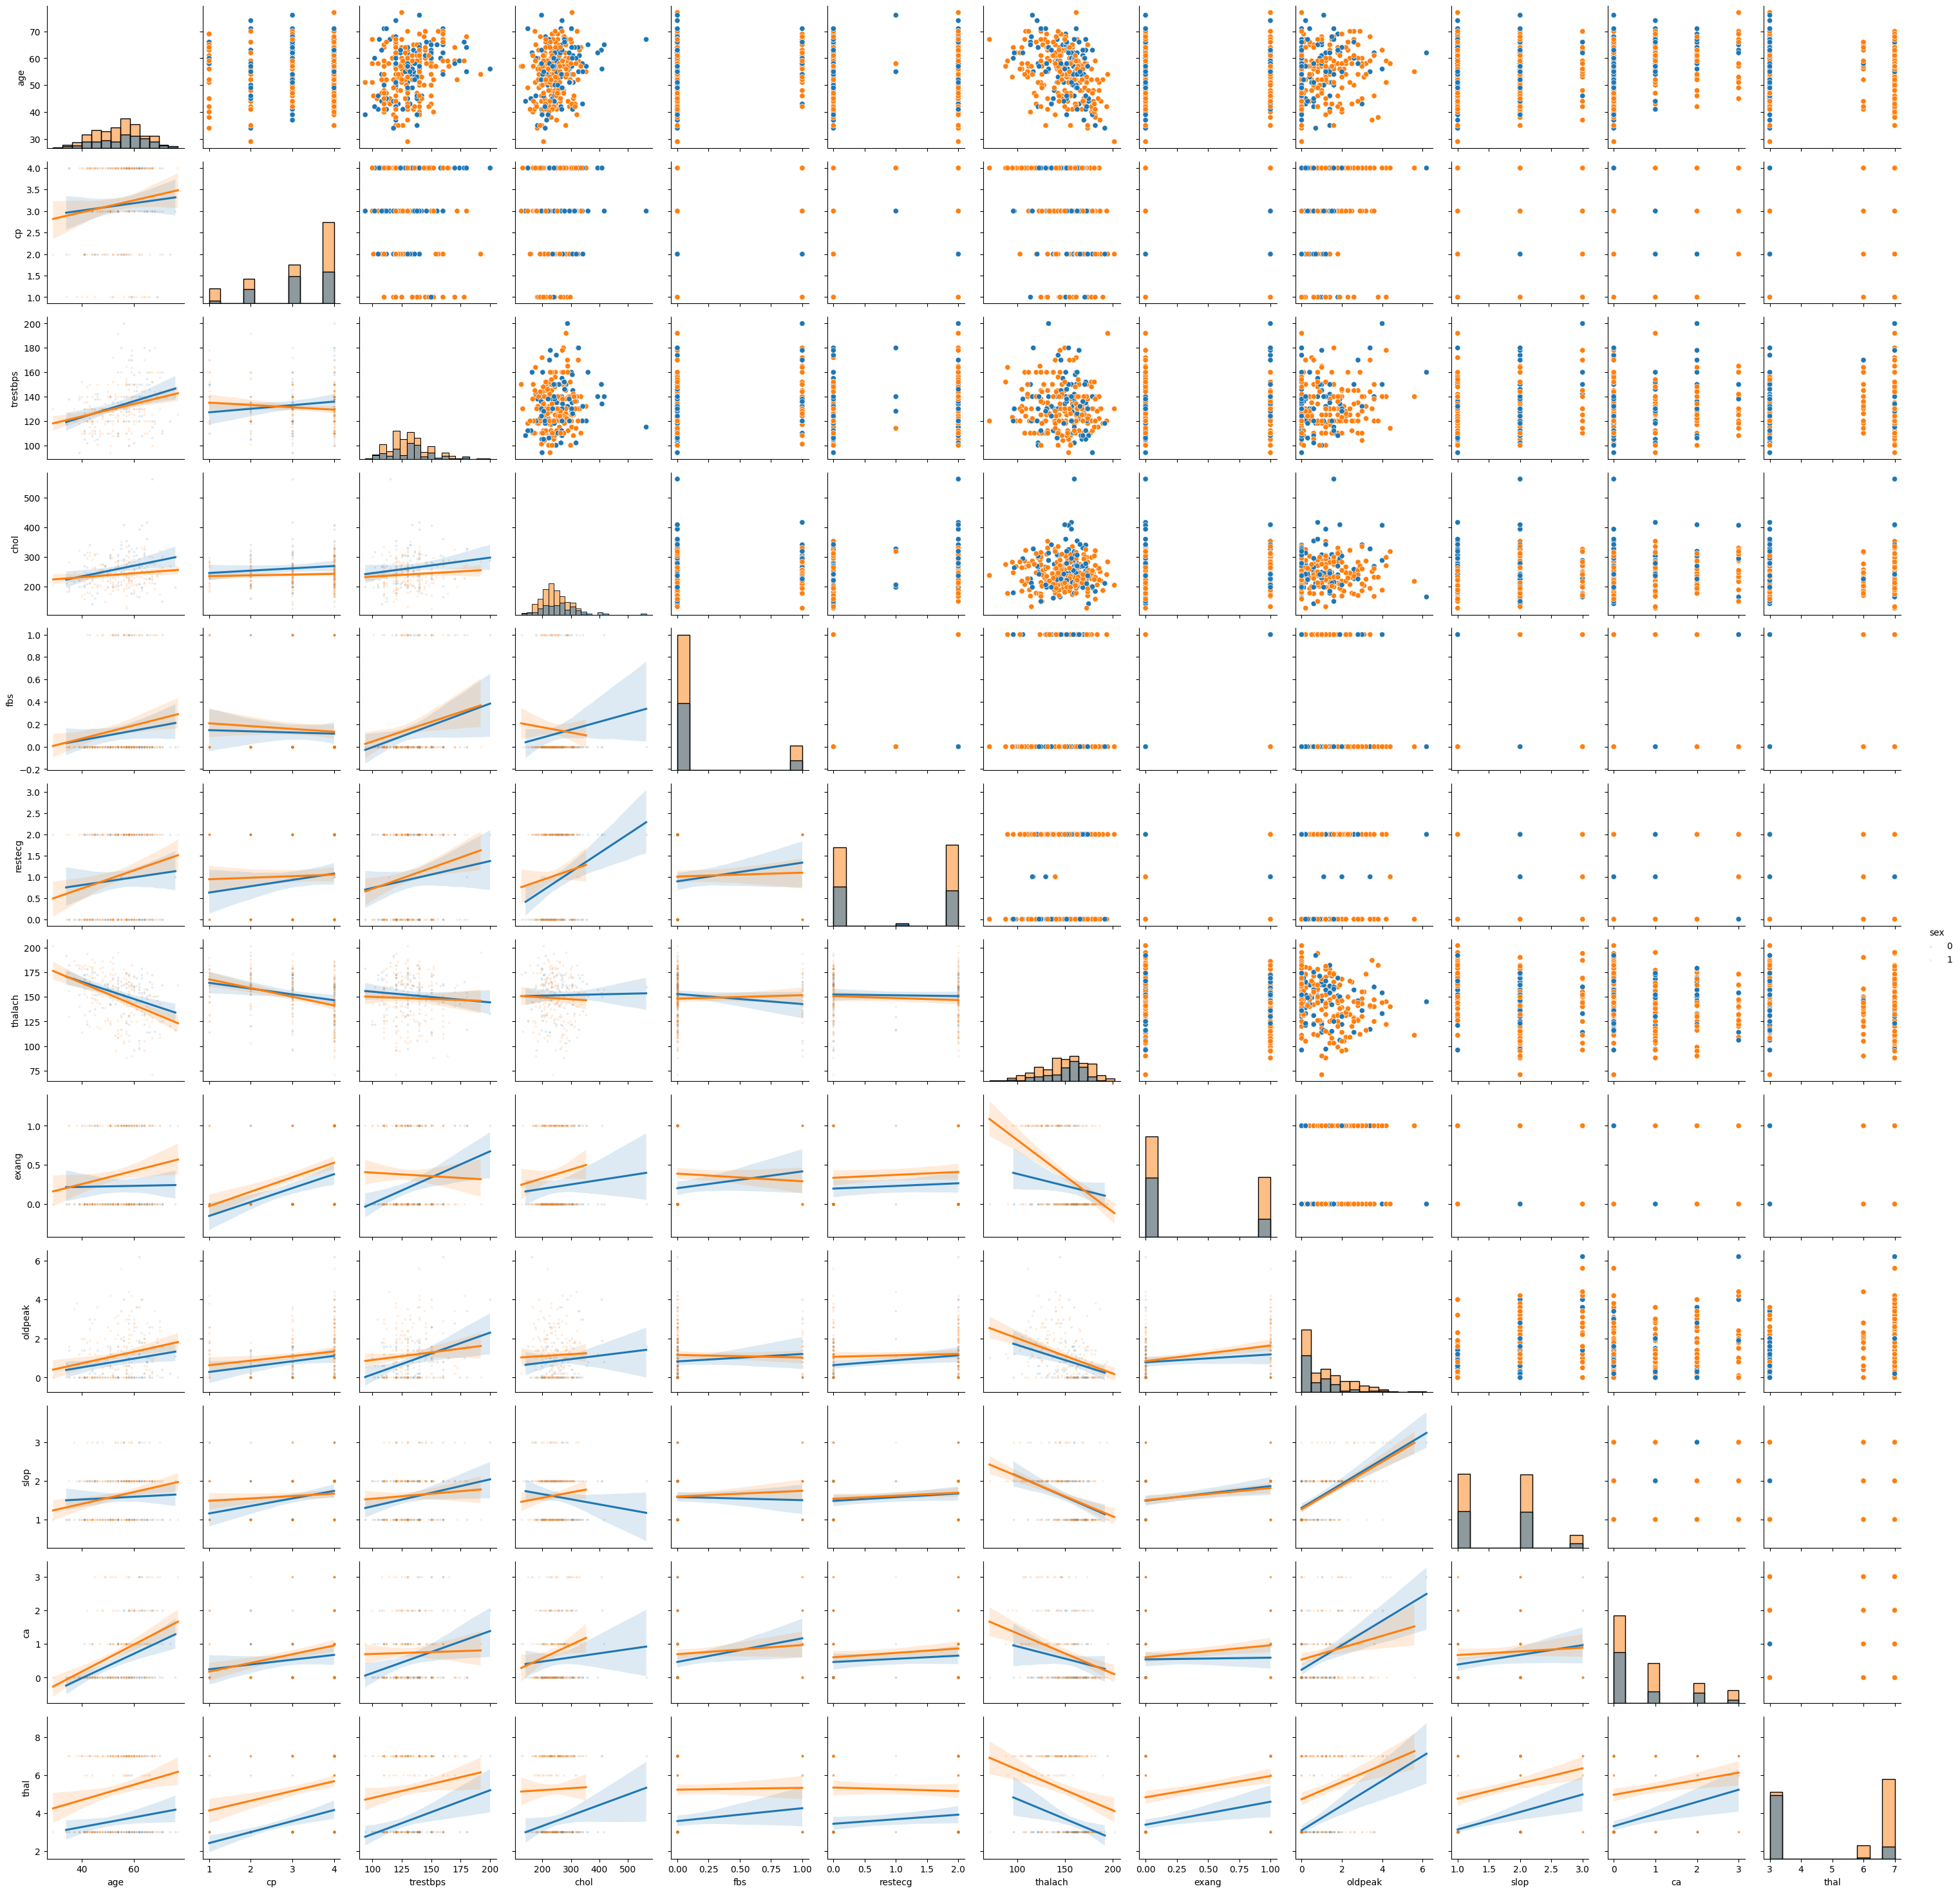

In [11]:
g = sns.PairGrid(df, hue="sex")
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.regplot,scatter_kws = {'alpha': 0.1,'s':3})
g = g.map_diag(sns.histplot)
g = g.add_legend()

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis = 1)
y = df['target']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier


In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
pred = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           N       0.77      0.83      0.80        53
           Y       0.79      0.72      0.75        46

    accuracy                           0.78        99
   macro avg       0.78      0.77      0.78        99
weighted avg       0.78      0.78      0.78        99

[[44  9]
 [13 33]]


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=100)

In [22]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           N       0.81      0.87      0.84        53
           Y       0.83      0.76      0.80        46

    accuracy                           0.82        99
   macro avg       0.82      0.81      0.82        99
weighted avg       0.82      0.82      0.82        99

[[46  7]
 [11 35]]
